In [68]:
import sys
sys.path.insert(0, '../')

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
fsize = 12
params = {'legend.fontsize': fsize*0.925,          
          'axes.labelsize': fsize,
          'axes.titlesize':fsize*1.25,
          'xtick.labelsize':fsize*0.925,
          'ytick.labelsize':fsize*0.925}
sns.set(palette='pastel', rc=params)


import os
import numpy as np
import scipy.io as sio

import seaborn as sns

from utils import io_utils
from analysis import analysis_funcs as af
from analysis import stats
from analysis import exp_filepaths
import pandas as pd

In [77]:
early_stopping_exps = {'$\delta=1e^{-4}, \\tau=2$': exp_filepaths.EARLY_STOPPING_2_1e4,
                       '$\delta=1e^{-4}, \\tau=4$': exp_filepaths.EARLY_STOPPING_4_1e4,
                       '$\delta=1e^{-4}, \\tau=6$': exp_filepaths.EARLY_STOPPING_6_1e4,
                       '$\delta=1e^{-3}, \\tau=4$': exp_filepaths.EARLY_STOPPING_4_1e3,
                       #'d=1e-5, p=4': exp_filepaths.EARLY_STOPPING_4_1e5}
                       '$\delta=0, \\tau=\\infty$': exp_filepaths.ARCH_UNET_RAW}
ordered_keys = ['$\delta=1e^{-4}, \\tau=2$', '$\delta=1e^{-4}, \\tau=4$', 
                '$\delta=1e^{-4}, \\tau=6$', '$\delta=1e^{-3}, \\tau=4$', 
                '$\delta=0, \\tau=\infty$'] #, 'd=1e-5, p=4']
cpal = sns.color_palette("muted", 8)

In [89]:
def linear_smoothing(vals, weight=0.6):
    info = [vals[i-1]*weight + vals[i]*(1-weight) for i in range(1,len(vals))]
    a = [np.nan]
    a.extend(info)
    return a

Text(0,0.5,'Validation Loss')

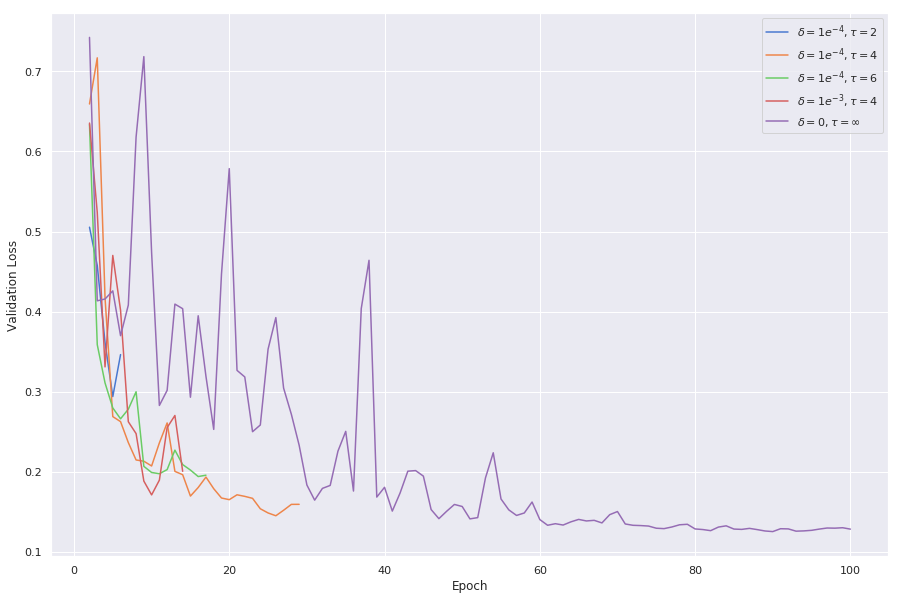

In [91]:
# plot validation losses
fig, ax = plt.subplots(1,1, figsize=(15, 10))

count = 0
for k in ordered_keys:
    exp_filepath = early_stopping_exps[k]
    # load pik file
    ind = exp_filepath.find('test_results')
    base_folder = exp_filepath[:ind]
    pik_path = os.path.join(base_folder, 'pik_data.dat')
    data = io_utils.load_pik(pik_path)
    epochs = data[0]
    val_loss = data[2]
    y = linear_smoothing(val_loss)
    ax.plot(epochs, y, color=cpal[count], linestyle='-')
    
    count += 1

ax.legend(ordered_keys)
ax.set_xlabel('Epoch')
ax.set_ylabel('Validation Loss')

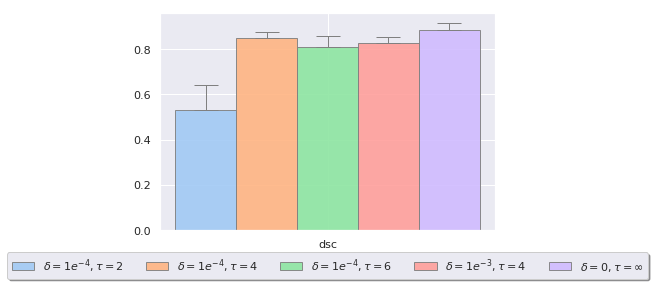

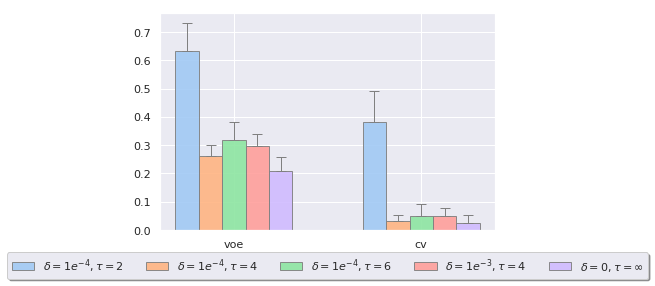

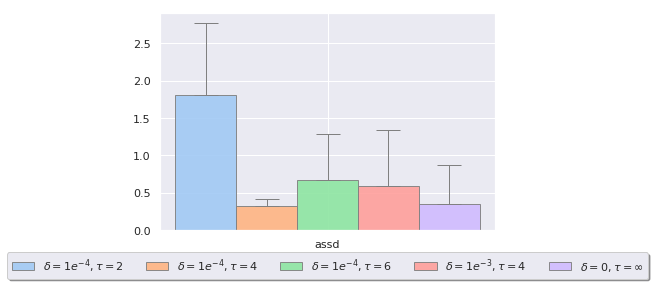

In [92]:
# plot validation losses
def plot_metrics(metrics):
    count = 0
    t_mean = []
    t_error = []

    for m in metrics:
        m_mean = []
        m_error = []
        for k in ordered_keys:
            exp_filepath = early_stopping_exps[k]
            metrics_path = os.path.join(exp_filepath, 'metrics.dat')
            data = io_utils.load_pik(metrics_path)[m]

            m_mean.append(np.mean(data))
            m_error.append(np.std(data))

        t_mean.append(m_mean)
        t_error.append(m_error)

    exp_means = pd.DataFrame(t_mean, index=metrics, columns=ordered_keys)
    exp_stds = pd.DataFrame(t_error, index=metrics, columns=ordered_keys)

    af.display_bar_graph(exp_means, exp_stds)

plot_metrics(['dsc'])
plot_metrics(['voe', 'cv'])
plot_metrics(['assd'])